This is for testing SEI growth. We have noticed that:

In the case of "electron-migration limited" mechanism:
 1. The SEI fluctuates (decreases) for default parameters (i.e. without using any parameter sets) and the "Chen2020", "Ai2020", "Marquis2019", and "Mohtat2020" parameter sets.
 2. Get error when using "OKane2022" parameter set.

In the case of "ec reaction limited" mechanism:
The initial inner and outer SEI thicknesses must be greater than 3e-12.


In [61]:
import pybamm
param = pybamm.ParameterValues("OKane2022")
param["Nominal cell capacity [A.h]"]

5.0

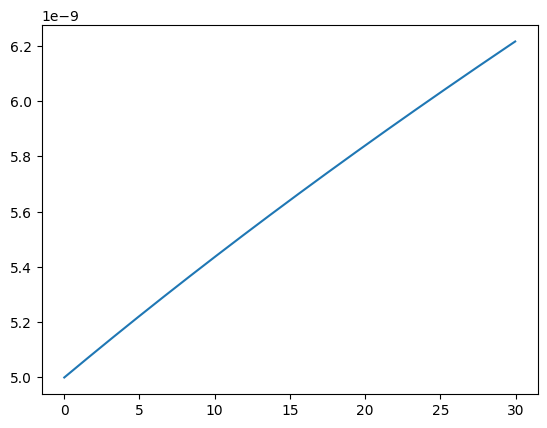

In [62]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
param = pybamm.ParameterValues("OKane2022")


# param['Initial inner SEI thickness [m]'] = 2.0e-12
# param['Initial outer SEI thickness [m]'] = 2.0e-12


cycle_no = 1
exp_CCCV = pybamm.Experiment(
    [("Charge at C/10 until 4.2 V",
        "Rest for 10 hours",
      "Discharge at C/10 until 2.5 V",
      )] * cycle_no
)

# Options of SEI Mechanism:
SEI_Mech = ["reaction limited", "solvent-diffusion limited",
            "interstitial-diffusion limited", "ec reaction limited", "electron-migration limited"]

# SEI Mechanism
index = 1
SPM_model = pybamm.lithium_ion.SPM(options={
    "SEI": SEI_Mech[index],
    "SEI porosity change": "true", })

sims_SPM = pybamm.Simulation(SPM_model, parameter_values=param,
                             experiment=exp_CCCV)
sol = sims_SPM.solve(initial_soc=0)

plt.plot(sol["Time [h]"].entries,
         sol['X-averaged total SEI thickness [m]'].entries)

In [63]:
plot = pybamm.QuickPlot(sims_SPM, time_unit='hours')

In [64]:
plot.dynamic_plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=29.97558585433252, step=0.2997558585433252),…

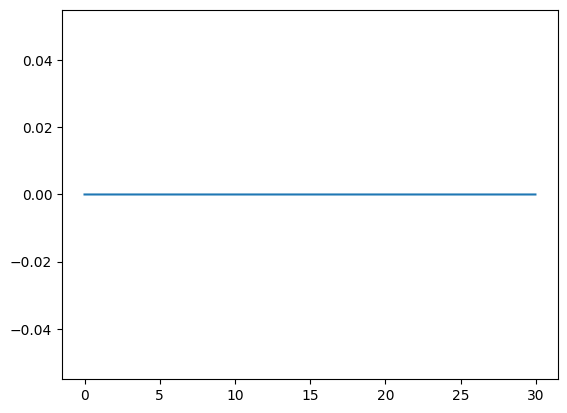

In [65]:
plt.plot(sol["Time [h]"].entries,
         sol["Contact overpotential [V]"].entries)

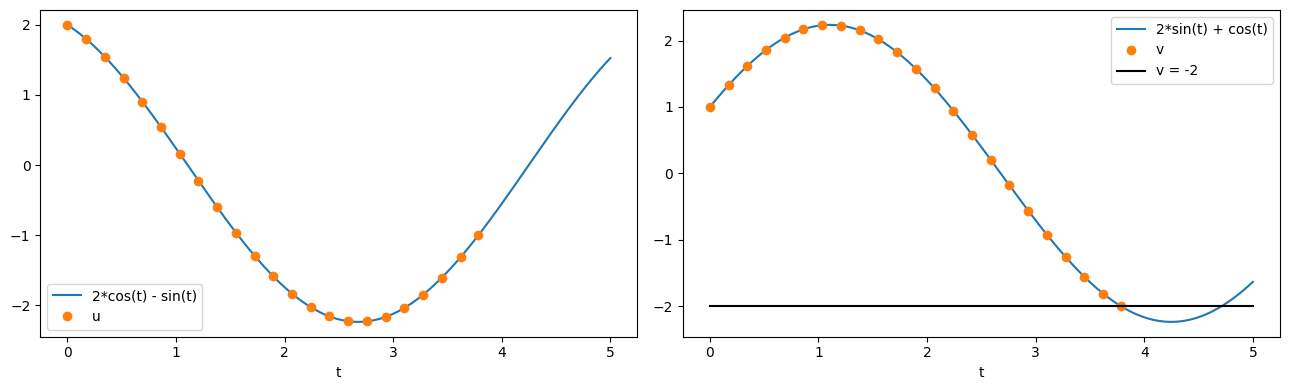

In [66]:
# Create model
model = pybamm.BaseModel()
u = pybamm.Variable("u")
v = pybamm.Variable("v")
model.rhs = {u: -v, v: u}
model.initial_conditions = {u: 2, v: 1}
model.events.append(pybamm.Event('v=-2', v + 2))  # New termination event
model.variables = {"u": u, "v": v}

# Discretise using default discretisation
disc = pybamm.Discretisation()
disc.process_model(model)

# Solve ########################
t_eval = np.linspace(0, 5, 30)
ode_solver = pybamm.ScipySolver()
solution = ode_solver.solve(model, t_eval)
################################

# Extract u and v
t_sol = solution.t
u = solution["u"]
v = solution["v"]

# Plot
t_fine = np.linspace(0, t_eval[-1], 1000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
ax1.plot(t_fine, 2 * np.cos(t_fine) - np.sin(t_fine), t_sol, u(t_sol), "o")
ax1.set_xlabel("t")
ax1.legend(["2*cos(t) - sin(t)", "u"], loc="best")

ax2.plot(t_fine, 2 * np.sin(t_fine) + np.cos(t_fine), t_sol,
         v(t_sol), "o", t_fine, -2 * np.ones_like(t_fine), "k")
ax2.set_xlabel("t")
ax2.legend(["2*sin(t) + cos(t)", "v", "v = -2"], loc="best")

plt.tight_layout()
plt.show()

In [102]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

# pybamm.FunctionParameter(
#     "Current function [A]", {"Time [s]": pybamm.t})


# def CC():
#     return 4

param = pybamm.ParameterValues("Chen2020")


# def my_current(t):
#     # return pybamm.sin(2 * np.pi * t / 60)
#     return pybamm.NotEqualHeaviside(pybamm.sin(2 * np.pi * t / 60), 0) + 1)

def my_current(t):
    t_ch = 100
    t_dch = 100
    t_rest = 100
    neg = -1
    DD1 = pybamm.EqualHeaviside(t, t_ch)
    DD2 = pybamm.EqualHeaviside(t, t_ch + t_rest)
    return pybamm.binary_operators._Heaviside()

# (-pybamm.EqualHeaviside(t, t_ch) + pybamm.EqualHeaviside(t, t_ch + t_rest)
#             + pybamm.EqualHeaviside(t, t_ch + t_rest + t_dch)
#             + pybamm.EqualHeaviside(t, t_ch + 2*t_rest + t_dch))


# t_eval = np.arange(0, 2001, 1)
# plt.plot(t_eval, my_current(t_eval))

# param["Current function [A]"] = my_current
model = pybamm.lithium_ion.SPM()
model.variables = {
    "cc2": my_current(pybamm.t),

}
sim = pybamm.Simulation(model, parameter_values=param)
t_eval = np.arange(0, 20000, 1)

sol = sim.solve(t_eval=t_eval)
# # plot = pybamm.QuickPlot(sim, time_unit='seconds')
# # plot.dynamic_plot()
# cc = sol["Current [A]"].entries
# tt = sol.t
# plt.plot(tt, cc)
# tt[-1]

tt = sol.t
cc = sol["cc2"].entries
plt.plot(tt, cc)

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.